In [2]:
using CSV, DataFrames, Distributions,StatsBase, PythonPlot, Turing
using MultivariateStats, DifferentialEquations,DynamicAxisWarping
include("./../processing_functions.jl")

NSF_CAREER_PATH = "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/PROPOSALS/NSFCareer2024/figures/growth_dynamics"

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/PROPOSALS/NSFCareer2024/figures/growth_dynamics"

In [5]:
df = CSV.read("./output/data_processed.csv",DataFrames.DataFrame);
lineages = unique(df.lineage)
df

Row,M,cell,label,length,lineage,lnM,position,time,age,lnM_sum,cellcycle,age_normed,gr,y_smoothed,gr_trend,gr_dt
,Float64,Int64,String31,Int64,Int64,Float64,Int64,Float64,Float64,Float64,String3,Float64,Float64,Float64,Float64,Float64
1,46.4017,1,01-02-2019-Table 1.csv,12,1,3.83734,1,7.12447,0.0,3.83734,i,0.0,0.000501261,3.91301,0.000640906,-0.000139645
2,46.5739,1,01-02-2019-Table 1.csv,12,1,3.84104,1,7.14483,0.00199809,3.84104,i,0.00199809,0.00048443,3.91351,0.000642911,-0.00015848
3,46.5485,1,01-02-2019-Table 1.csv,12,1,3.8405,1,7.16435,0.00391374,3.8405,i,0.00391374,0.000508311,3.91399,0.000644865,-0.000136554
4,46.6353,1,01-02-2019-Table 1.csv,12,1,3.84236,1,7.18467,0.0059079,3.84236,i,0.0059079,0.000491178,3.9145,0.000646934,-0.000155756
5,46.6078,1,01-02-2019-Table 1.csv,12,1,3.84177,1,7.20415,0.00781962,3.84177,i,0.00781962,0.000527402,3.91499,0.000648951,-0.000121549
6,46.6544,1,01-02-2019-Table 1.csv,12,1,3.84277,1,7.2249,0.00985598,3.84277,i,0.00985598,0.000504748,3.91552,0.000651135,-0.000146387
7,46.7341,1,01-02-2019-Table 1.csv,12,1,3.84447,1,7.2446,0.0117893,3.84447,i,0.0117893,0.000518291,3.91602,0.000653245,-0.000134953
8,46.8252,1,01-02-2019-Table 1.csv,12,1,3.84642,1,7.26467,0.0137589,3.84642,i,0.0137589,0.00050517,3.91654,0.000655429,-0.00015026
9,46.9155,1,01-02-2019-Table 1.csv,12,1,3.84835,1,7.28408,0.0156638,3.84835,i,0.0156638,0.000524318,3.91705,0.000657577,-0.000133259


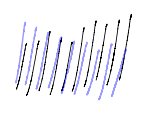

In [3]:
fig,ax = subplots(figsize=(2,1.5))

k = 2
tmax = 100

df1 = df[df.lineage .== lineages[k],:]
for cell in unique(df1.cell)
    if max(df1[df1.cell .==cell,:time]...)<tmax
        ax.plot(df1[df1.cell .==cell,:time],df1[df1.cell .==cell,:M],"k-",lw=0.6)
        # ax.plot([df1[df1.cell .==cell,:time][end],df1[df1.cell .==cell,:time][end]],
        # [df1[df1.cell .==cell,:M][end],df1[df1.cell .==cell+1,:M][1]],"k--",lw=0.9)
    end
end

df1 = df[df.lineage .== lineages[5],:]
for cell in unique(df1.cell)
    if max(df1[df1.cell .==cell,:time]...)<tmax
        ax.plot(df1[df1.cell .==cell,:time],df1[df1.cell .==cell,:M],"b-",lw=1,alpha=0.4)
        # ax.plot([df1[df1.cell .==cell,:time][end],df1[df1.cell .==cell,:time][end]],
        # [df1[df1.cell .==cell,:M][end],df1[df1.cell .==cell+1,:M][1]],"k--",lw=0.9)
    end
end


tight_layout()
#ax.set_xlabel("time")
#ax.set_ylabel("M")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["left"].set_visible(false)
ax.spines["bottom"].set_visible(false)
gca().tick_params(bottom = false) 
gca().tick_params(axis="both", left=false, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false)
savefig(NSF_CAREER_PATH*"/intro_traces.pdf",bbox_inches="tight")
fig


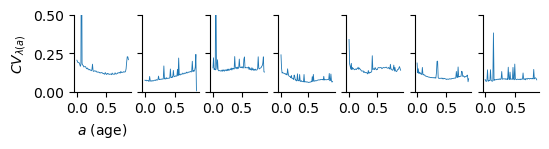

In [4]:

fig, axs = subplots(figsize=(6,1),ncols=length(lineages),sharey=true)

for k in 1:length(lineages)
    ax = axs[k-1]
    df1 = df[df.lineage .== lineages[k],:]
    df1 = df1[df1.cellcycle .== "i",:]
    df1[:,:age_round] = round.(df1.age_normed,digits = 2)
    df1_pool = combine(groupby(df1,:age_round,sort=true),:gr => mean => :grm,:gr_dt => var => :grv);

    CV = sqrt.(df1_pool.grv ./ (df1_pool.grm .^2))
    ax.plot(df1_pool.age_round,CV ,"-",lw=0.6)
    
    ax.set_ylim([0,0.5])
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    
end

axs[0].set_ylabel(L"$CV_{\lambda(a)}$")
axs[0].set_xlabel(L"$a$ (age)")

fig

In [ ]:
fig, axs = subplots(figsize=(6,1),ncols=length(lineages),sharey=true)

for k in 1:length(lineages)
    ax = axs[k-1]
    df1 = df[df.lineage .== lineages[k],:]
    df1 = df1[df1.cellcycle .== "i",:]
    df1[:,:age_round] = round.(df1.age_normed,digits = 2)
    df1_pool = combine(groupby(df1,:age_round,sort=true),:gr => mean => :grm,:gr_dt => var => :grv);

    CV = sqrt.(df1_pool.grv ./ (df1_pool.grm .^2))
    ax.plot(df1_pool.age_round,CV ,"-",lw=0.8)
    
    ax.set_ylim([0,0.5])
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    
end

axs[0].set_ylabel(L"$CV_{\lambda(a)}$")
axs[0].set_xlabel(L"$a$ (age)")

fig

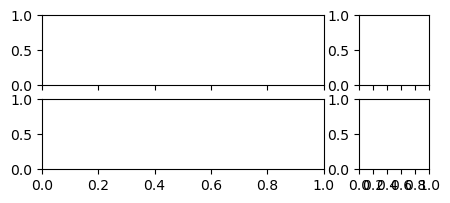

In [12]:


fig,axs = subplots(figsize=(10/2,4/2),ncols=2,nrows=2,gridspec_kw=Dict(["width_ratios" =>[4, 1]]),sharex=true)
fig

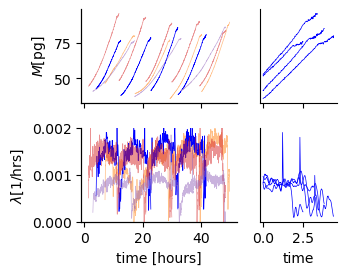

In [13]:

lw=0.5
fig,axs = subplots(figsize=(5/1.4,4/1.4),ncols=2,nrows=2,gridspec_kw=Dict(["width_ratios" =>[4, 2]]),sharex="col")
tmax = 50
ax = axs[0,0]
ax2 = ax.twinx()
for k in 1:length(lineages[1:4])
    df1 = df[df.lineage .== lineages[k],:]
    for cell in unique(df1.cell)
        if max(df1[df1.cell .==cell,:time]...)<tmax
            ax.plot(df1[df1.cell .==cell,:time],df1[df1.cell .==cell,:M],"-",lw= lw,alpha= (k==2) ? 1 : 0.5,color= (k==2) ? "b" : "C"*string(k))
            
            #ax2.plot(df1[df1.cell .==cell,:time],(df1[df1.cell .==cell,:gr] .- mean(df1[df1.cell .==cell,:gr]))
            #./std(df1[df1.cell .==cell,:gr]),"-",lw= 1,alpha= (k==2) ? 0.2 : 0.,color= (k==2) ? "b" : "C"*string(k))
        end
    end
end

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["top"].set_visible(false)
ax2.tick_params(axis="both", left=false, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false)
ax2.set_ylim([-5,5])

ax.set_ylabel(L"$M$[pg]")
ax = axs[0,1]
k = 2
tight_layout()
df1 = df[df.lineage .== lineages[k],:]
for j  in 1:4
    cell  =  unique(df1.cell)[j]
    ax.plot(df1[df1.cell .==cell,:time][300:end] .-df1[df1.cell .==cell,:time][300],df1[df1.cell .==cell,:M][300:end],"b-",lw=lw)
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
end
ax.tick_params(axis="both", left=false, labelleft=false)

# ------------------------------------------------------------------------------------------
ax = axs[1,0]

ax2 = ax.twinx()
for k in 1:length(lineages[1:4])
    df1 = df[df.lineage .== lineages[k],:]
    for cell in unique(df1.cell)
        if max(df1[df1.cell .==cell,:time]...)<tmax
            ax.plot(df1[df1.cell .==cell,:time],df1[df1.cell .==cell,:gr],"-",lw= lw,alpha= (k==2) ? 1 : 0.5,color= (k==2) ? "b" : "C"*string(k))
            
            #ax2.plot(df1[df1.cell .==cell,:time],(df1[df1.cell .==cell,:gr] .- mean(df1[df1.cell .==cell,:gr]))
            #./std(df1[df1.cell .==cell,:gr]),"-",lw= 1,alpha= (k==2) ? 0.2 : 0.,color= (k==2) ? "b" : "C"*string(k))
        end
    end
end

ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["top"].set_visible(false)
ax2.tick_params(axis="both", left=false, top=false, right=false, bottom=false, labelleft=false, labeltop=false, labelright=false, labelbottom=false)
ax.set_ylim([0,0.002])
ax.set_ylabel(L"$\lambda$[1/hrs]")
ax.set_xlabel("time [hours]")

ax = axs[1,1]
k = 2
tight_layout()
df1 = df[df.lineage .== lineages[k],:]
for j  in 1:4
    cell  =  unique(df1.cell)[j]
    ax.plot(df1[df1.cell .==cell,:time][300:end] .-df1[df1.cell .==cell,:time][300],df1[df1.cell .==cell,:gr][300:end],"b-",lw=lw)
    ax.spines["right"].set_visible(false)
    ax.spines["top"].set_visible(false)
    ax.set_xlabel("time")
end
ax.tick_params(axis="both", left=false, labelleft=false)

tight_layout()


#savefig(NSF_CAREER_PATH*"/traces_long.pdf",bbox_inches="tight")
fig

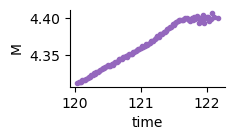

In [14]:
fig,ax = subplots(figsize=(2,1))
k = 4
df1 = df[df.lineage .== lineages[k],:]
cell  =  unique(df1.cell)[8]
ax.plot(df1[df1.cell .==cell,:time][640:end],df1[df1.cell .==cell,:lnM][640:end],"C"*string(k)*".",lw=0.9)
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.set_xlabel("time")
ax.set_ylabel("M")
savefig(NSF_CAREER_PATH*"/traces_zoomin.pdf",bbox_inches="tight")
fig

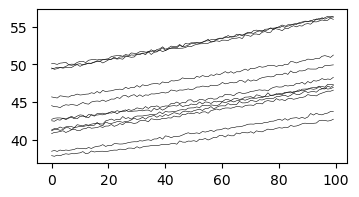

In [15]:
dfs = groupby(df,:lineage)
Ys = []
for d in dfs
    Y = align_vectors([df[:,:M] for df in groupby(d,:position)],100)
    push!(Ys,Y)
end
fig, ax = subplots(figsize=(4,2))
ax.plot(Ys[2],"k-",lw=0.4)


fig


In [16]:
function dimension_reduce_bylineage(y,time,age,lnm,n1,n2,n3)
    X = hcat(ones(length(time)),time)
    b = X\y
    dy = y .- X*b;
    X12sin = hcat([sin.(2*pi*k .*time) for k in 1:n1]...);
    X12cos = hcat([cos.(2*pi*k .*time) for k in 1:n1]...);
    X22sin = hcat([sin.(2*pi*k .*age) for k in 1:n2]...);
    X22cos = hcat([cos.(2*pi*k .*age) for k in 1:n2]...);
    # X32sin = hcat([sin.(2*pi*k .*lnm ./mean(lnm)) for k in 1:n3]...);
    # X32cos = hcat([cos.(2*pi*k .*lnm ./mean(lnm)) for k in 1:n3]...);
    X2 = hcat(X12sin,X12cos,X22sin,X22cos)
    b2 = X2\dy;
    X = hcat(X,X2)
    b = vcat(b,b2)
    return b
end


dimension_reduce_bylineage (generic function with 1 method)

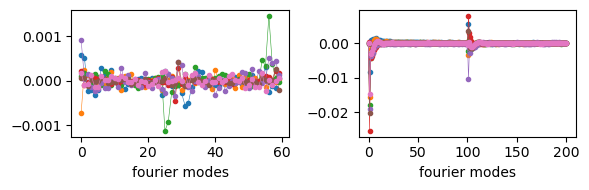

In [17]:
n1 = 30
n2 = 100
n3 = 3
B = hcat([dimension_reduce_bylineage(df_lin.lnM_sum,df_lin.time,df_lin.age,df_lin.lnM,n1,n2,n3) for df_lin in groupby(df,:lineage)]...)

fig,axs = subplots(figsize=(6,2),ncols=2)

ax = axs[0]
for k in 1:length(lineages)
    ax.plot(B[3:3+2*n1-1,k],".-",lw=0.4)
end
ax.set_xlabel("fourier modes")
ax = axs[1]
for k in 1:length(lineages)
    ax.plot(B[3+2*n1-1:3+2*n1+2*n2-1,k],".-",lw=0.4)
end
ax.set_xlabel("fourier modes")



ax.set_xlabel("fourier modes")
tight_layout()
fig

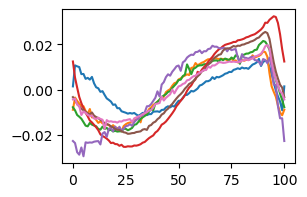

In [18]:


time = collect(0:0.01:1)
X2sin = hcat([sin.(2*pi*k .*time) for k in 1:n2]...);
X2cos = hcat([cos.(2*pi*k .*time) for k in 1:n2]...);
X2 = hcat(X2sin,X2cos)

fig,ax = subplots(figsize=(3,2))
for k in 1:length(lineages)
    ax.plot(X2*B[3+2*n1:end,k])
end
fig

In [664]:
X2*B[3+2*n1:end,1];

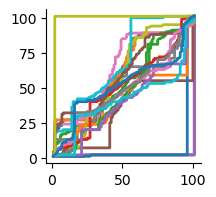

In [19]:


fig,ax = subplots(figsize=(2,2))
for i in 1:length(lineages)
    for j in 1:i-1
        y1,y2 = X2*B[3+2*n1:end,i],X2*B[3+2*n1:end,j]
        cost, i1, i2 = dtw(y1,y2,transportcost=0.9)
        ax.plot(i1,i2,"-",lw=2)
    end
end
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
fig

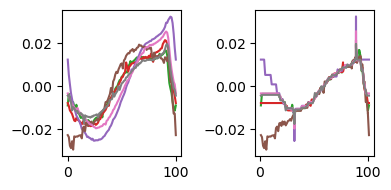

In [839]:
fig,axs = subplots(figsize=(4,2),ncols=2)

for i in 2:length(lineages)
    y1,y2 = X2*B[3+2*n1:end,1],X2*B[3+2*n1:end,i]
    cost, i1, i2 = dtw(y1,y2,transportcost =1)
    
    ax = axs[0]
    ax.plot(y2,"C"*string(i)*"-")

    ax = axs[1]
    ax.plot(i1,y2[i2],"C"*string(i)*"-")
end
tight_layout()
fig


In [21]:
function dimension_reduce_bycell(y,time)
    X = hcat(ones(length(time)),time)
    b = X\y
    dy = y .- X*b;
    X2sin = hcat([sin.(2*pi*k .*time) for k in 1:20]...);
    X2cos = hcat([cos.(2*pi*k .*time) for k in 1:20]...);
    X2 = hcat(X2sin,X2cos)
    b2 = X2\dy;
    X = hcat(X,X2)
    b = vcat(b,b2)
    return b
end

df_lin = df[df.lineage .==1,:]
df_cells = groupby(df_lin,:position);


In [22]:
B = [
    hcat(
        [dimension_reduce(df_cell.lnM,df_cell.age_normed) for df_cell in groupby(df_lin,:position)
        ]...)
        for df_lin in groupby(df,:lineage)];

UndefVarError: UndefVarError: `dimension_reduce` not defined

In [23]:
fig,axs = subplots(figsize=(10,2),ncols = length(B),sharey=true,sharex=true)
for i in 1:length(B)
    ax = axs[i-1]
    ax.plot(mean(B[i][3:end,:],dims=2),"C"*string(i)*".")
end

for i in 1:length(B)
    for j in 1:length(B)
        ax = axs[i-1]
        ax.plot(mean(B[j][3:end,:],dims=2),"k-",alpha=0.1)
    end
end

fig

MethodError: MethodError: no method matching getindex(::Float64, ::UnitRange{Int64}, ::Colon)

Closest candidates are:
  getindex(::Number, !Matched::Integer)
   @ Base number.jl:96
  getindex(::Number)
   @ Base number.jl:95
  getindex(::Number, !Matched::Integer...)
   @ Base number.jl:101
  ...


In [697]:
time = collect(0:0.01:1)
X2sin = hcat([sin.(2*pi*k .*time) for k in 1:20]...);
X2cos = hcat([cos.(2*pi*k .*time) for k in 1:20]...);
X2 = hcat(X2sin,X2cos)

fig,ax = subplots(figsize=(3,2))
for b in B
    ax.plot(X2*b[3:end,1])
end
fig

MethodError: MethodError: no method matching getindex(::Float64, ::UnitRange{Int64}, ::Int64)

Closest candidates are:
  getindex(::Number, !Matched::Integer...)
   @ Base number.jl:101
  getindex(::Number, !Matched::Integer)
   @ Base number.jl:96
  getindex(::Number)
   @ Base number.jl:95
  ...
